Text(0.5, 0, 'Population of City in 10,000s')

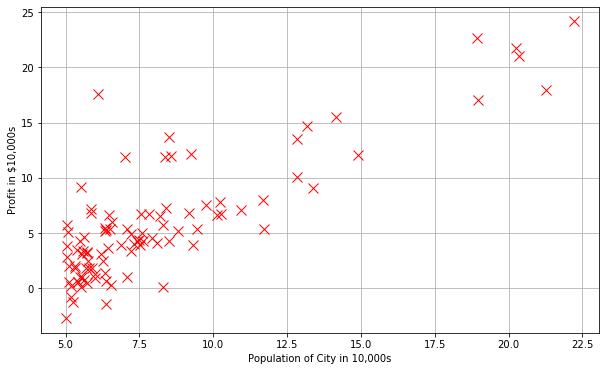

In [17]:
%matplotlib inline
data = 'ex1data1.txt'
import numpy as np
import matplotlib.pyplot as plt
cols = np.loadtxt(data,delimiter=',',usecols=(0,1),unpack=True)
x= np.transpose(np.array(cols[:-1]))
y= np.transpose(np.array(cols[-1:]))
m = len(y)#to get number of training examples
x = np.insert(x,0,1,axis=1)
plt.figure(figsize=(10,6))
plt.plot(x[:,1],y[:,0],'rx',markersize=10)

In [18]:
def h(x,theta):
    return np.dot(theta,x)
def computecost(theta,x,y):
    return float((1./(2*m)) * np.dot((h(theta,x)-y).T,(h(theta,x)-y)))
initial_theta = np.zeros((x.shape[1],1))
print(computecost(initial_theta,x,y))

32.07273387745567


In [23]:
iterations = 1500
alpha = 0.01
jvec = []
thetahistory = []
def gradient_descent(x,theta_start=np.zeros(2)):
    theta = theta_start
    for i in range(iterations):
        tmptheta = theta
        jvec.append(computecost(theta,x,y))
        thetahistory.append(list(theta[:,0]))
        for j in range(len(tmptheta)):
            theta = theta -  (alpha/m*(np.dot(x.T , (h(theta,x) - y))))
        return theta,jvec, thetahistory
print(gradient_descent(x,initial_theta))

(array([[0.06289175],
       [0.77000978]]), [32.07273387745567], [[0.0, 0.0]])


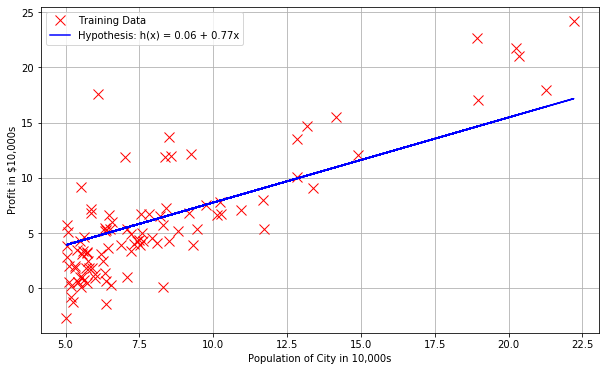

In [7]:
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,6))
plt.plot(x[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(x[:,1],myfit(x[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend()

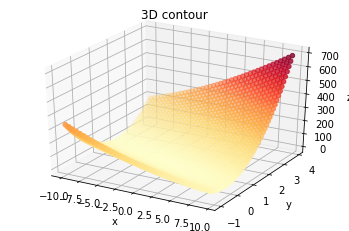

<Figure size 720x432 with 0 Axes>

In [28]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(np.array([[david], [kaleko]]),x,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'))

fig = plt.figure(figsize=(10,6))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D contour')
plt.show()